In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data/Salary_Data.csv


In [3]:
df=pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
df.shape

(6704, 6)

In [17]:
df1=df.copy()
df1.drop_duplicates()
df1.shape

(6704, 6)

In [155]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox

In [26]:
df.dropna(subset=['Salary'],inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [34]:
L=LabelEncoder()
df['Gender']=L.fit_transform(df['Gender'])

In [36]:
df.rename({'Education Level':'Education_Level','Job Title':'Job_Title','Years of Experience':'Years_of_Experience'},axis=1,inplace=True)

In [39]:
df.Education_Level.replace({"Bachelor's Degree":"Bachelor's","Master's Degree":"Master's","phD":"PhD"},inplace=True)

In [40]:
df.Education_Level.unique()

array(["Bachelor's", "Master's", 'PhD', nan, 'High School'], dtype=object)

In [57]:
Ordin=OrdinalEncoder(categories=[['High School',"Bachelor's", "Master's", 'PhD',np.nan]],encoded_missing_value=np.nan)

In [59]:
df['Education_Level']=Ordin.fit_transform(np.array(df['Education_Level']).reshape(-1,1))


In [66]:
L=LabelEncoder()
df['Job_Title']=L.fit_transform(df['Job_Title'])

In [90]:
knn=KNNImputer()
df['Education_Level']=knn.fit_transform(df[['Education_Level']])

In [76]:
Iter=IterativeImputer(random_state=42)
df_iter=pd.Series(Iter.fit_transform(df[['Education_Level']]).flatten(),name='Education_Level')

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df1=df.copy()

In [122]:
df['Education_Level']=np.where((df.Education_Level>1) & (df.Education_Level<2),2,df.Education_Level)

In [126]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,1,1.0,176,5.0,90000.0
1,28.0,0,2.0,18,3.0,65000.0
2,45.0,1,3.0,145,15.0,150000.0
3,36.0,0,1.0,116,7.0,60000.0
4,52.0,1,2.0,26,20.0,200000.0


In [149]:
import plotly.express as px
px.box(df,y='Age')

In [152]:
df.Age=np.clip(df['Age'],21,53)

<Axes: ylabel='Density'>

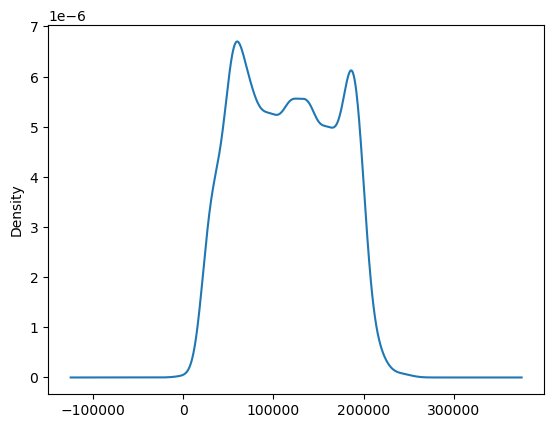

In [160]:
df['Salary'].plot(kind='kde')

In [172]:
m=MinMaxScaler()
df['Salary']=m.fit_transform(df[['Salary']])

<Axes: ylabel='Density'>

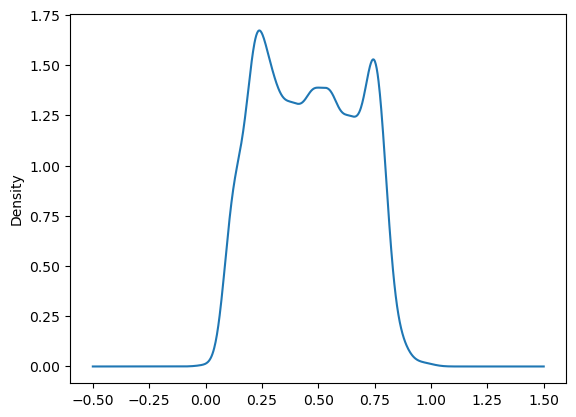

In [159]:
df1.Salary.plot(kind='kde')

In [164]:
df2=df.copy()

In [165]:
s=StandardScaler()
df2['Salary']=s.fit_transform(df[['Salary']])

<Axes: ylabel='Density'>

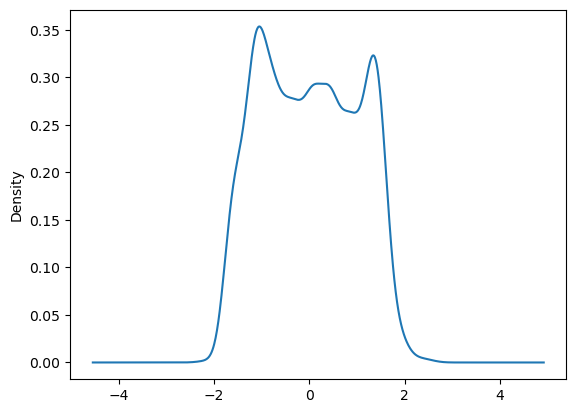

In [166]:
df2.Salary.plot(kind='kde')

<Axes: ylabel='Density'>

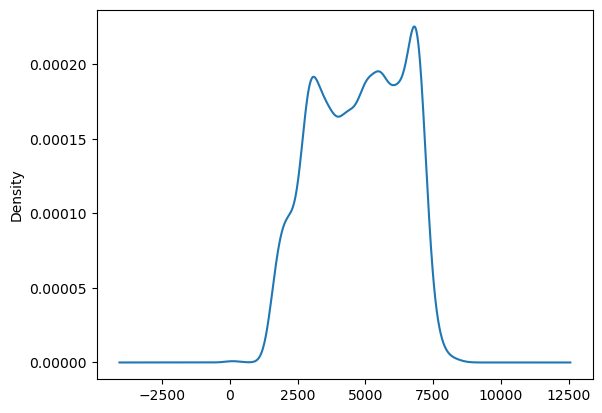

In [169]:
df3=df.copy()
df3['Salary']=boxcox(df['Salary'])[0]
df3.Salary.plot(kind='kde')

<Axes: ylabel='Density'>

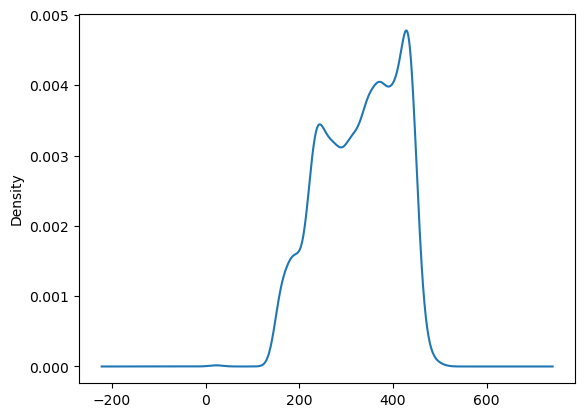

In [171]:
df4=df.copy()
df4['Salary']=np.sqrt(df['Salary'])
df4.Salary.plot(kind='kde')

In [173]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,1,1.0,176,5.0,0.359103
1,28.0,0,2.0,18,3.0,0.258963
2,45.0,1,3.0,145,15.0,0.599439
3,36.0,0,1.0,116,7.0,0.238935
4,52.0,1,2.0,26,20.0,0.799720


In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [177]:
X=df.drop('Salary',axis=1)
y=df['Salary']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [178]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [183]:
y_pred=model.predict(X_test)

array([0.31529339, 0.40402265, 0.31515569, ..., 0.22014272, 0.33444763,
       0.38647274])

In [184]:
Y_test

2460    0.360100
2230    0.539355
5559    0.319047
3080    0.255686
265     0.158822
          ...   
3306    0.639495
3578    0.599439
6672    0.198878
2748    0.238935
3925    0.299019
Name: Salary, Length: 2010, dtype: float64

In [186]:
model.score(X_test,Y_test)

0.7056852094182496